# Draw the Japanese earthquakes in 2-D map

##  Ryota Kiuchi
https://sites.google.com/view/rkiuchi/home

https://www.linkedin.com/in/ryota-kiuchi-b121819b/

### Purpose: 

Visualise Japanese earthquake distribution to capture clusters, Mainshock/Aftershock activities. It is also useful to show public in the lecture

### 3 different ways to draw the map

#### 1. Statistic 2-D map
#### 2. Interactive 2-D map with sliders
#### 3. Time lapse 2-D map

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab
import numpy as np
import matplotlib.cm as cm
from matplotlib import animation
import pandas as pd
import matplotlib.colors as mcol
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import os
import glob

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, SelectionRangeSlider, Output, HBox, VBox, Layout

import seaborn as sns

import datetime
from dateutil.relativedelta import relativedelta

## - Import the data file

Choose data period in the "data" directory

In [2]:
###############----Read the JMA event catalog----###############
# You can choose the period you want
file_list = glob.glob('data/h199*.csv')
file_list.extend(glob.glob('data/h200*.csv'))
file_list.extend(glob.glob('data/h201*.csv'))

# Combine multiple csv file to single pandas table
for i in range(len(file_list)):
    eachdata = pd.read_csv(file_list[i])
    if (i == 0):
        data = eachdata
    else:
        data = pd.concat([data, eachdata])

## - Filter the data
Filter the earthquakes based on magnitude, depth, event latitude, and event longitude

In [3]:
### Data selection
## For magnitude
data = data[data.Mag >= 1]

## For depth
#data = data[data.Depth <= 50]

## For event latitude
#data = data[data.Evla <= 50]

## For event longitude
#data = data[data.Evlo <= 50]

In [4]:
# Change format to datetime for event date
data.DateTime=pd.to_datetime(data.DateTime,format='%Y%m%d%H%M%S')

# Convert to numpy array for each parameter
date = np.array(data['DateTime'])
evlon = np.array(data['Evlo'])
evlat = np.array(data['Evla'])
evDepth = np.array(data['Depth'])
evMag = np.array(data['Mag'])

## Plot the earthquake distribution on simple 2-D map


Select the range of map

In [5]:
# Range of map
# For whole area of Japan
lonmin = 125
lonmax = 150
latmin = 25
latmax = 50

<IPython.core.display.Javascript object>


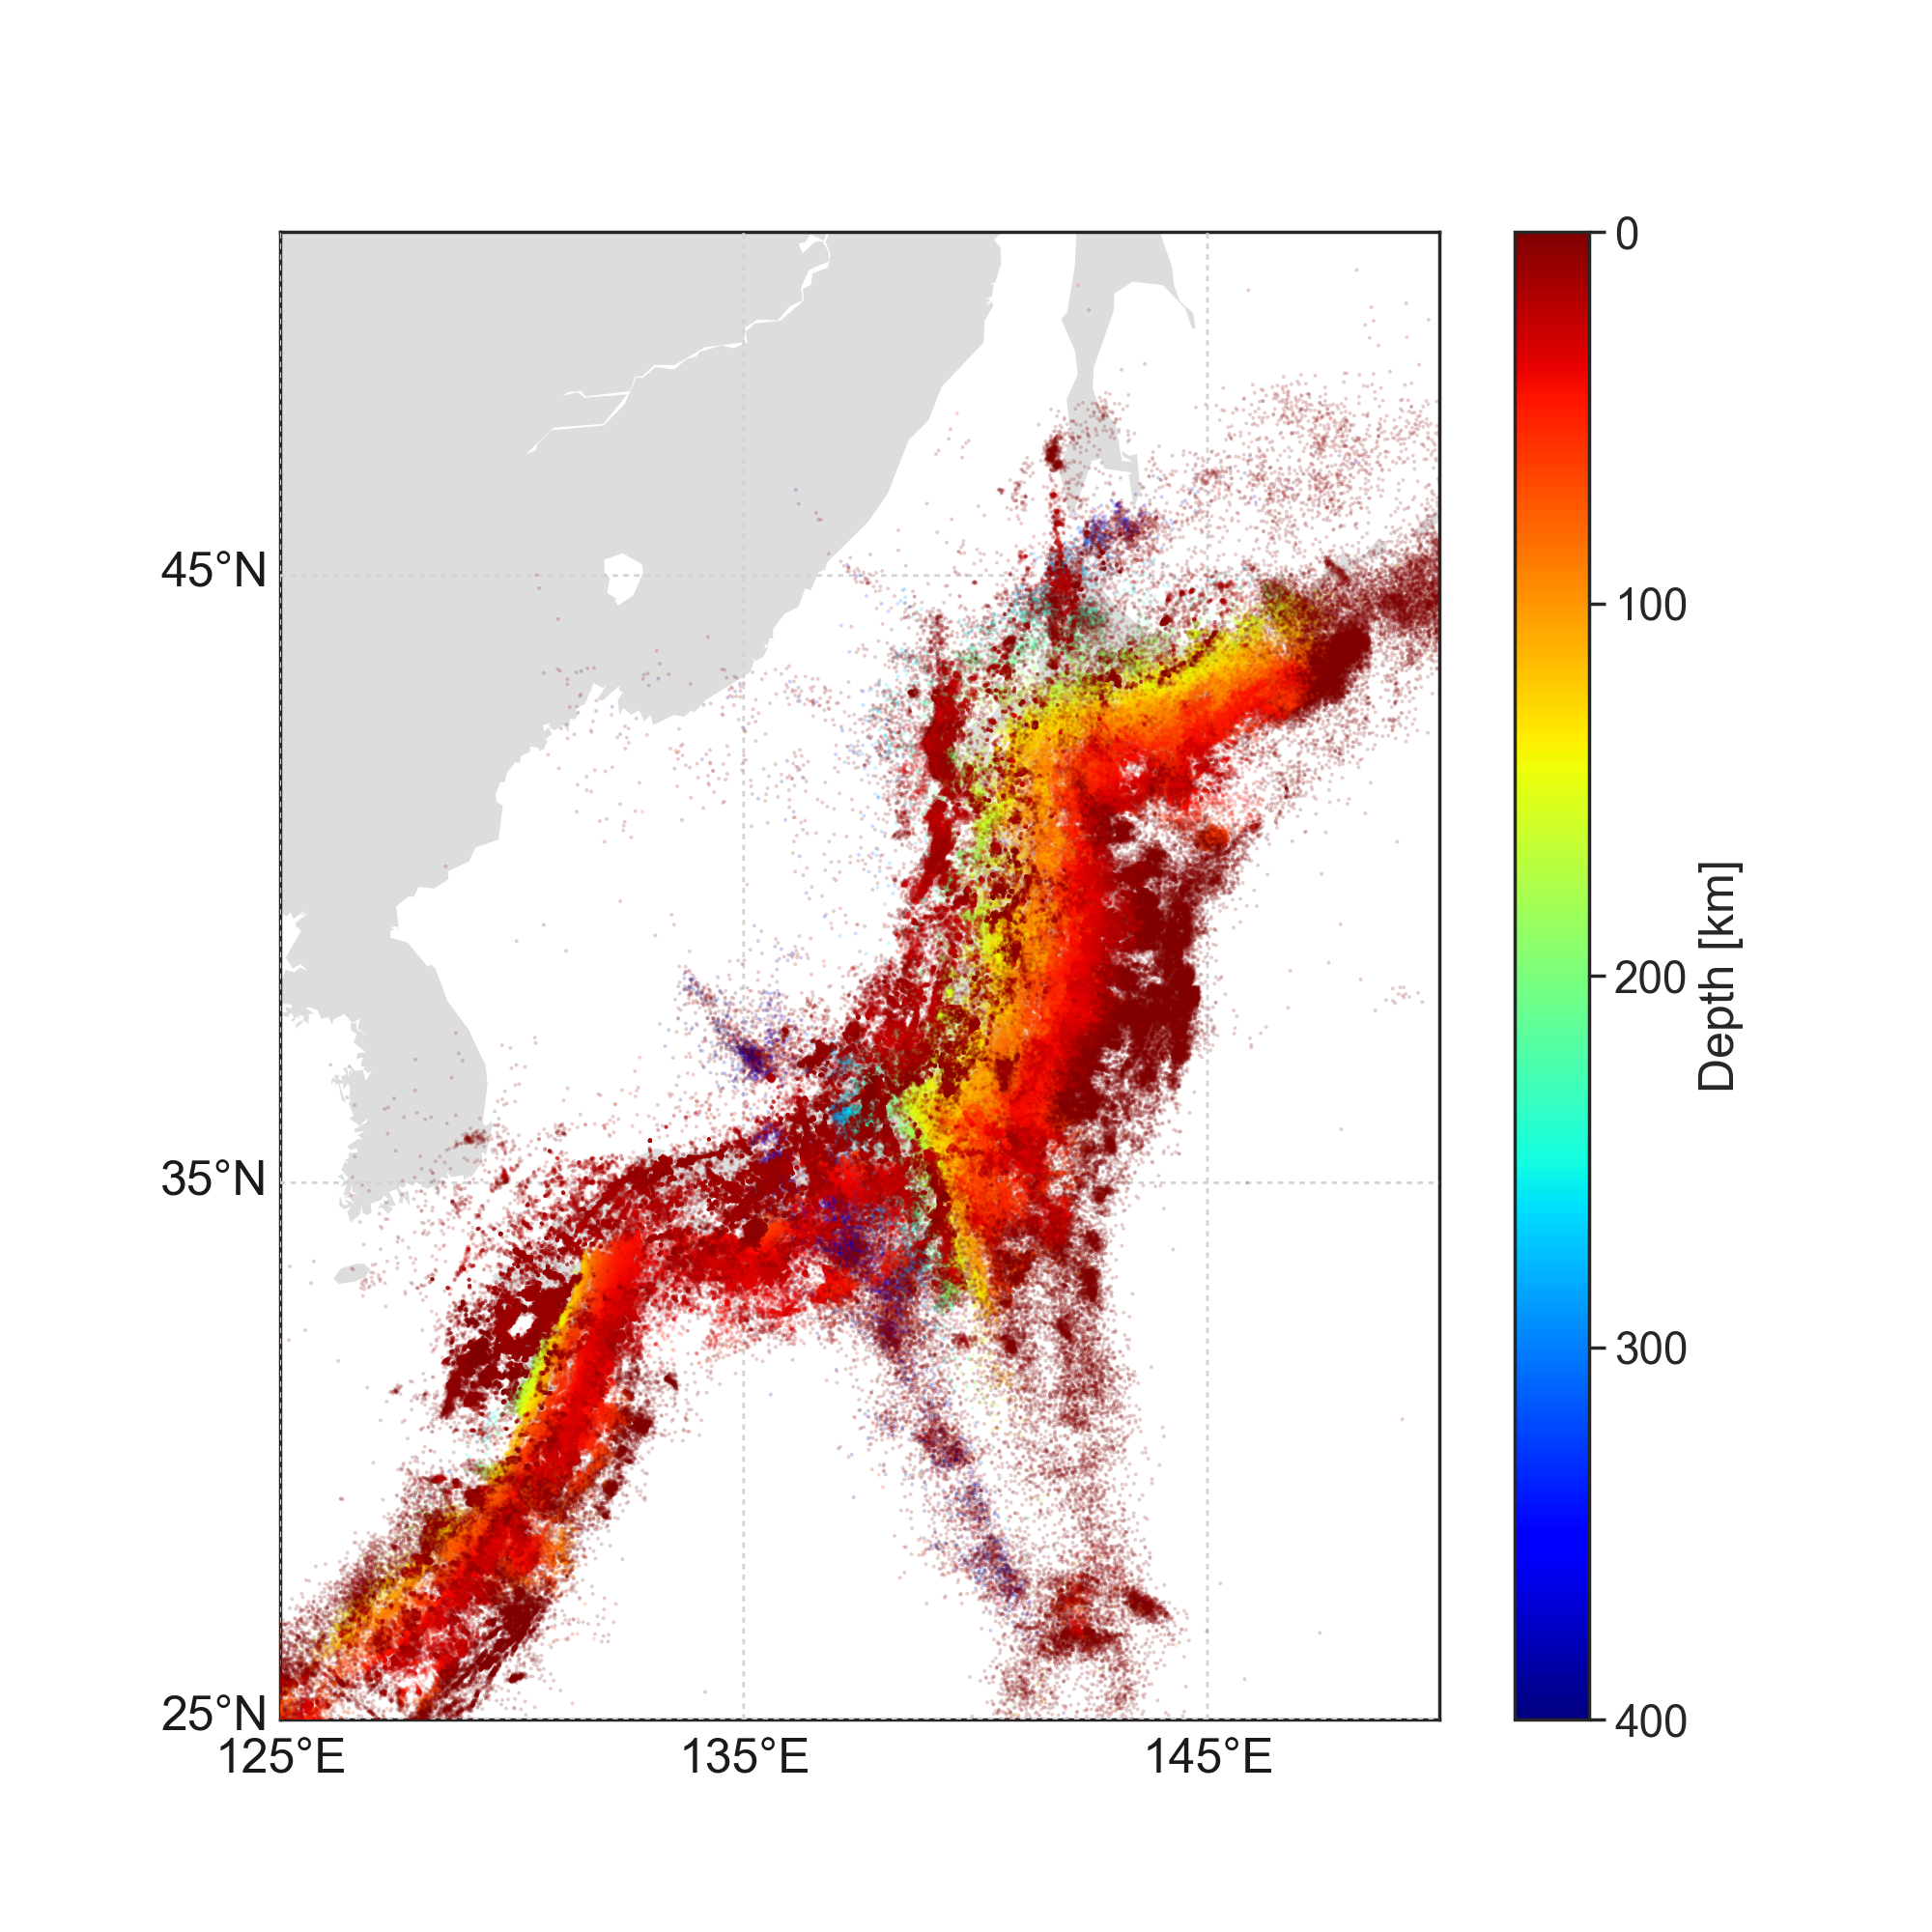

In [7]:
# Import Seaborn style
sns.set(style='ticks', font_scale=1.5)

###############----Draw the basemap----###############
fig = plt.figure(figsize=(10,10))

map = Basemap(projection='merc',llcrnrlat=latmin,urcrnrlat=latmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,lat_ts=5,resolution='l')
map.fillcontinents(color='#DDDDDD',zorder=0)

### Import the arcgis image
# We can also select the options of arcgis image, if you have internet
#map = Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax)
#http://server.arcgisonline.com/arcgis/rest/services
# Select arcgis image
#map.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True)
#map.arcgisimage(service='World_Shaded_Relief', xpixels = 1500, verbose= True)
###############----Draw the basemap----###############


# Set input parameters for showing the map
x, y = map(evlon, evlat)

# For color scale
color = evDepth
cmin = 0.
cmax = 400.
cticks = np.arange(0,500,100)

# For plot size
#size = evMag * 2
size = 2

# Set the color palette
cpalette = cm.get_cmap('jet_r')
#cpalette = cm.seismic

# Add paralles and meridians
parallels = np.arange(latmin,latmax,10)
meridians = np.arange(lonmin,lonmax,10)
map.drawparallels(parallels,labels=[1,0,0,0], dashes=[2,2], zorder=5, color='lightgrey')
map.drawmeridians(meridians,labels=[0,0,0,1], dashes=[2,2], zorder=5, color='lightgrey')

###############----plot the data----###############
map.scatter(x, y, s=size, c=color, cmap=cpalette, alpha=0.2, lw=0, antialiased=True, zorder=10) 
# alpha is transparency through 0(transparent) to 1(solid)

# Set the color bar
plt.clim(cmin, cmax)
cb = plt.colorbar(label='Depth [km]', orientation = 'vertical')
cb.set_alpha(1)
cb.set_ticks(cticks)
cb.draw_all()
cb.ax.invert_yaxis()

plt.show()

plt.savefig("Results/EQDistribution_2D.png")


## - Interactive 2-D plot
Change the parameter (Date, Depth, Magnitude, Plot size, Transparency, Map ) with slider
E.g. We can find some clustered seismicity, if we reduce the transparency parameter.

!! Note that you cannot export interactive plot

<IPython.core.display.Javascript object>


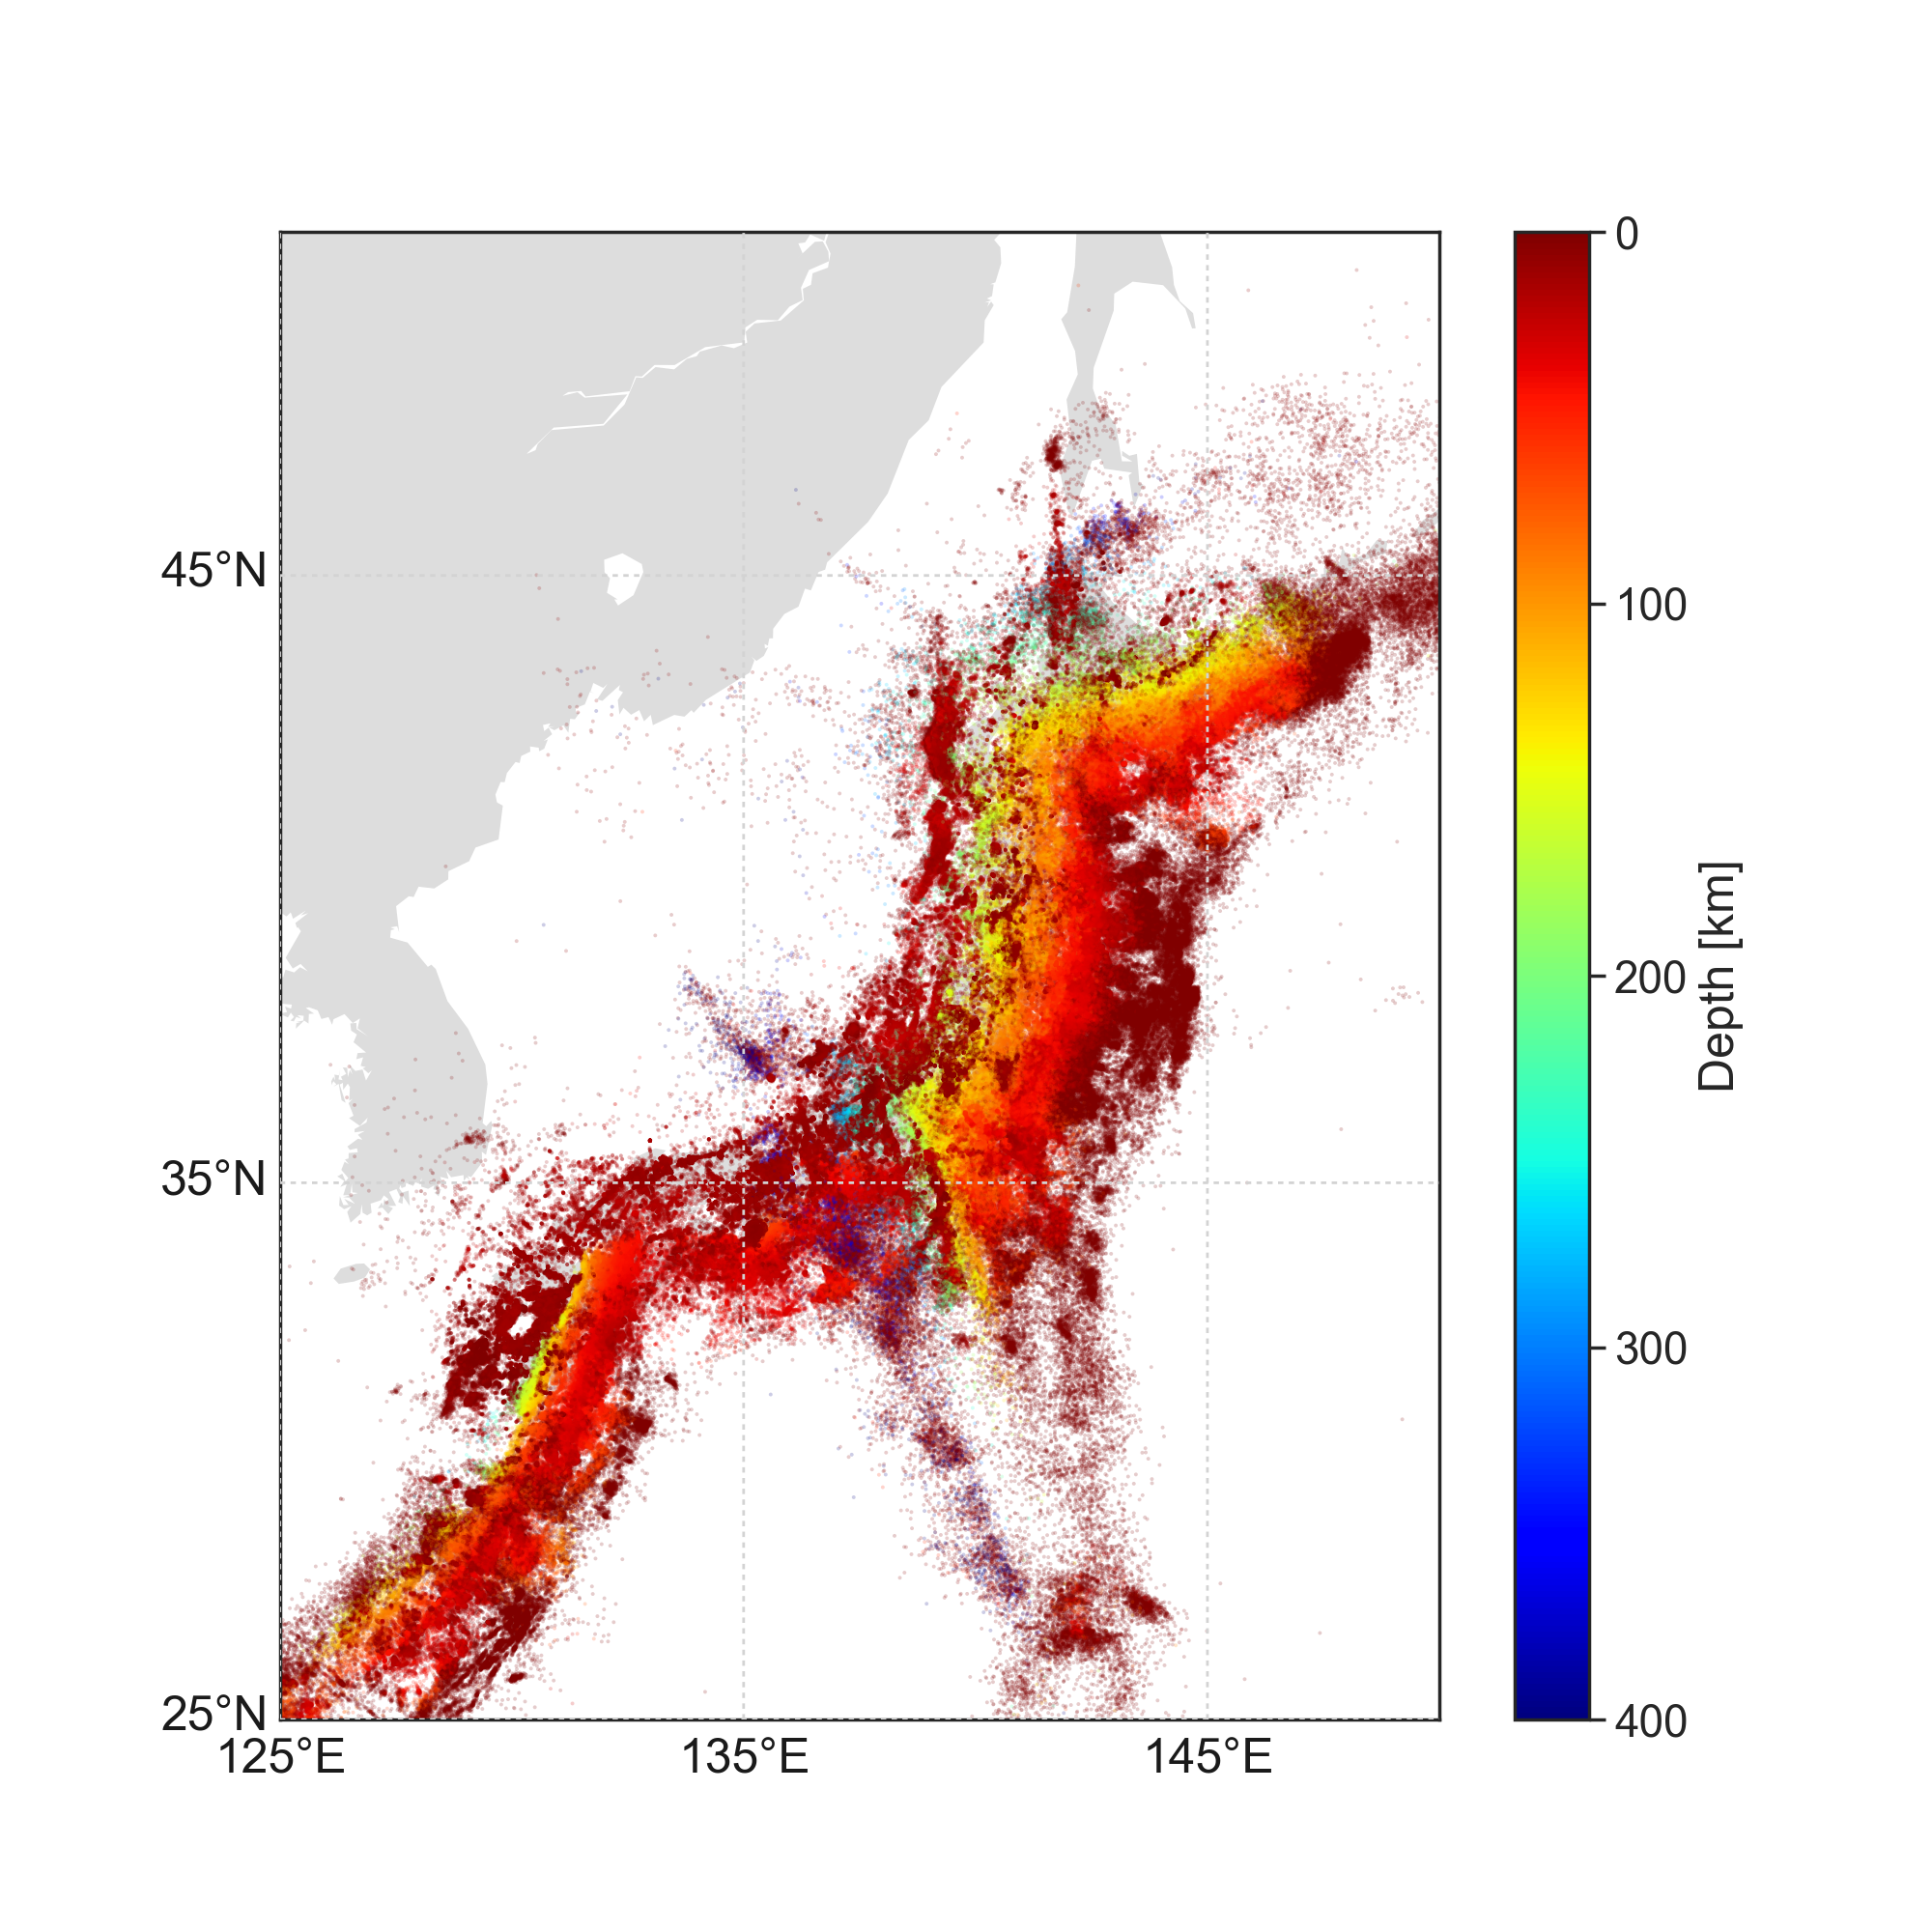

In [8]:
# Import Seaborn style
sns.set(style='ticks', font_scale=1.5)

###############----Draw the basemap----###############

fig = plt.figure(figsize=(10,10))

map = Basemap(projection='merc',llcrnrlat=latmin,urcrnrlat=latmax,\
              llcrnrlon=lonmin,urcrnrlon=lonmax,lat_ts=5,resolution='l')

###############----Draw the basemap----###############

# Set the color palette
cpalette = cm.get_cmap('jet_r')
#cpalette = cm.seismic
cmin = 0.
cmax = 400.
cticks = np.arange(0,500,100)

# For plot size
size = 2

# Add paralles and meridians
parallels = np.arange(latmin,latmax,10)
meridians = np.arange(lonmin,lonmax,10)


###############----Draw the initial map----###############
# Set input parameters for showing the map
x, y = map(evlon, evlat)

# For color scale
color = evDepth

# Add paralles and meridians
map.drawparallels(parallels,labels=[1,0,0,0], dashes=[2,2], zorder=5, color='lightgrey')
map.drawmeridians(meridians,labels=[0,0,0,1], dashes=[2,2], zorder=5, color='lightgrey')

###############----plot the data----###############
map.scatter(x, y, s=size, c=color, cmap=cpalette, lw=0, antialiased=True, zorder=10) 

# Set the color bar
plt.clim(cmin, cmax)
cb = plt.colorbar(label='Depth [km]', orientation = 'vertical')
cb.set_alpha(1)
cb.set_ticks(cticks)
cb.draw_all()
cb.ax.invert_yaxis()
###############----Draw the initial map----###############


def para(Daterange, Depthrange, Mrange, Plotsize, Transparency, Map):
    ### Clean the figure
    plt.clf()
    ax = plt.gca()
    #del ax.collections[:]
    
    ### Draw the map or not
    if (Map):
        map.fillcontinents(color='#DDDDDD',zorder=0)    
        
    map.drawparallels(parallels,labels=[1,0,0,0], dashes=[2,2], zorder=5, color='lightgrey')
    map.drawmeridians(meridians,labels=[0,0,0,1], dashes=[2,2], zorder=5, color='lightgrey')

    ### Data selection
    # Select the date range
    Date1 = np.datetime64(Daterange[0])
    Date2 = np.datetime64(Daterange[1])
    select_Date = np.where((date >= Date1) & (date < Date2))
    # Data within setting bin
    datebin = date[select_Date]
    evlonbin = evlon[select_Date]
    evlatbin = evlat[select_Date]
    evDepthbin = evDepth[select_Date]
    evMagbin = evMag[select_Date]
    
    # Select the Magnitude
    M1 = Mrange[0]
    M2 = Mrange[1]
    select_M = np.where((evMagbin >= M1) & (evMagbin < M2))
    datebin = datebin[select_M]
    evlonbin = evlonbin[select_M]
    evlatbin = evlatbin[select_M]
    evDepthbin = evDepthbin[select_M]
    evMagbin = evMagbin[select_M]
    
    # Select the Depth
    Depth1 = Depthrange[0]
    Depth2 = Depthrange[1]
    select_Depth = np.where((evDepthbin >= Depth1) & (evDepthbin < Depth2))
    datebin = datebin[select_Depth]
    evlonbin = evlonbin[select_Depth]
    evlatbin = evlatbin[select_Depth]
    evDepthbin = evDepthbin[select_Depth]
    evMagbin = evMagbin[select_Depth]
    
    
    # Draw the data
    map.scatter(x, y, s=size, c=color, cmap=cpalette, alpha=Transparency, lw=0,  antialiased=True) 
    
    plt.clim(cmin, cmax)
    cb = plt.colorbar(label='Depth [km]', orientation = 'vertical')
    cb.set_alpha(1)
    cb.draw_all()
    cb.set_ticks(cticks)
    cb.ax.invert_yaxis()
    
    plt.show()

# For date range
'''
### Change with date
Dstart = datetime(1990, 1, 1)
Dend = datetime(2016, 12, 31)
dates = pd.date_range(Dstart, Dend, freq='D')
Dateoptions = [(date.strftime('%d %b %Y'), date) for date in dates]
index = (0, len(Dateoptions)-1)
'''

### Change with month
Monstart = datetime.datetime(1990, 1, 1)
Monend = datetime.datetime(2016, 12, 31)
Months = pd.date_range(Monstart, Monend, freq='M')
Dateoptions = [(Month.strftime('%b %Y'), Month) for Month in Months]
index = (0, len(Dateoptions)-1)


DaterangeSlider = SelectionRangeSlider(
    options=Dateoptions,
    index=index,
    description='Dates',
    orientation='horizontal',
    layout={'width': '500px'}
)

# For magnitude range
Mbin = 1
M1 = 0
M2 = 9 + Mbin
Moptions = [(str(mag), mag) for mag in range(M1, M2, Mbin)]
index = (0, len(Moptions)-1)
MrangeSlider = SelectionRangeSlider(
    options=Moptions,
    index=index,
    description='Mag',
    orientation='horizontal',
    layout={'width': '300px'}
)

# For depth range
Depthbin = 10
Depth1 = 0
Depth2 = 700 + Depthbin
Depthoptions = [(str(depth), depth) for depth in range(Depth1, Depth2, Depthbin)]
index = (0, len(Depthoptions)-1)
DepthrangeSlider = SelectionRangeSlider(
    options=Depthoptions,
    index=index,
    description='Depth',
    orientation='horizontal',
    layout={'width': '300px'}
)

widget = interactive(para, Daterange=DaterangeSlider, Depthrange=DepthrangeSlider, Mrange=MrangeSlider, Plotsize = (0,10), Transparency = (0,1.0), Map = False)



# Check what is the inside of widget (interactive)
# Output figure is in the last component of array
#print(widget.children)
controls = VBox(widget.children[:-1], layout = Layout(flex_flow='row wrap'))
output = widget.children[-1]
display(HBox([controls, output]))





## - Time lapse animation

<IPython.core.display.Javascript object>


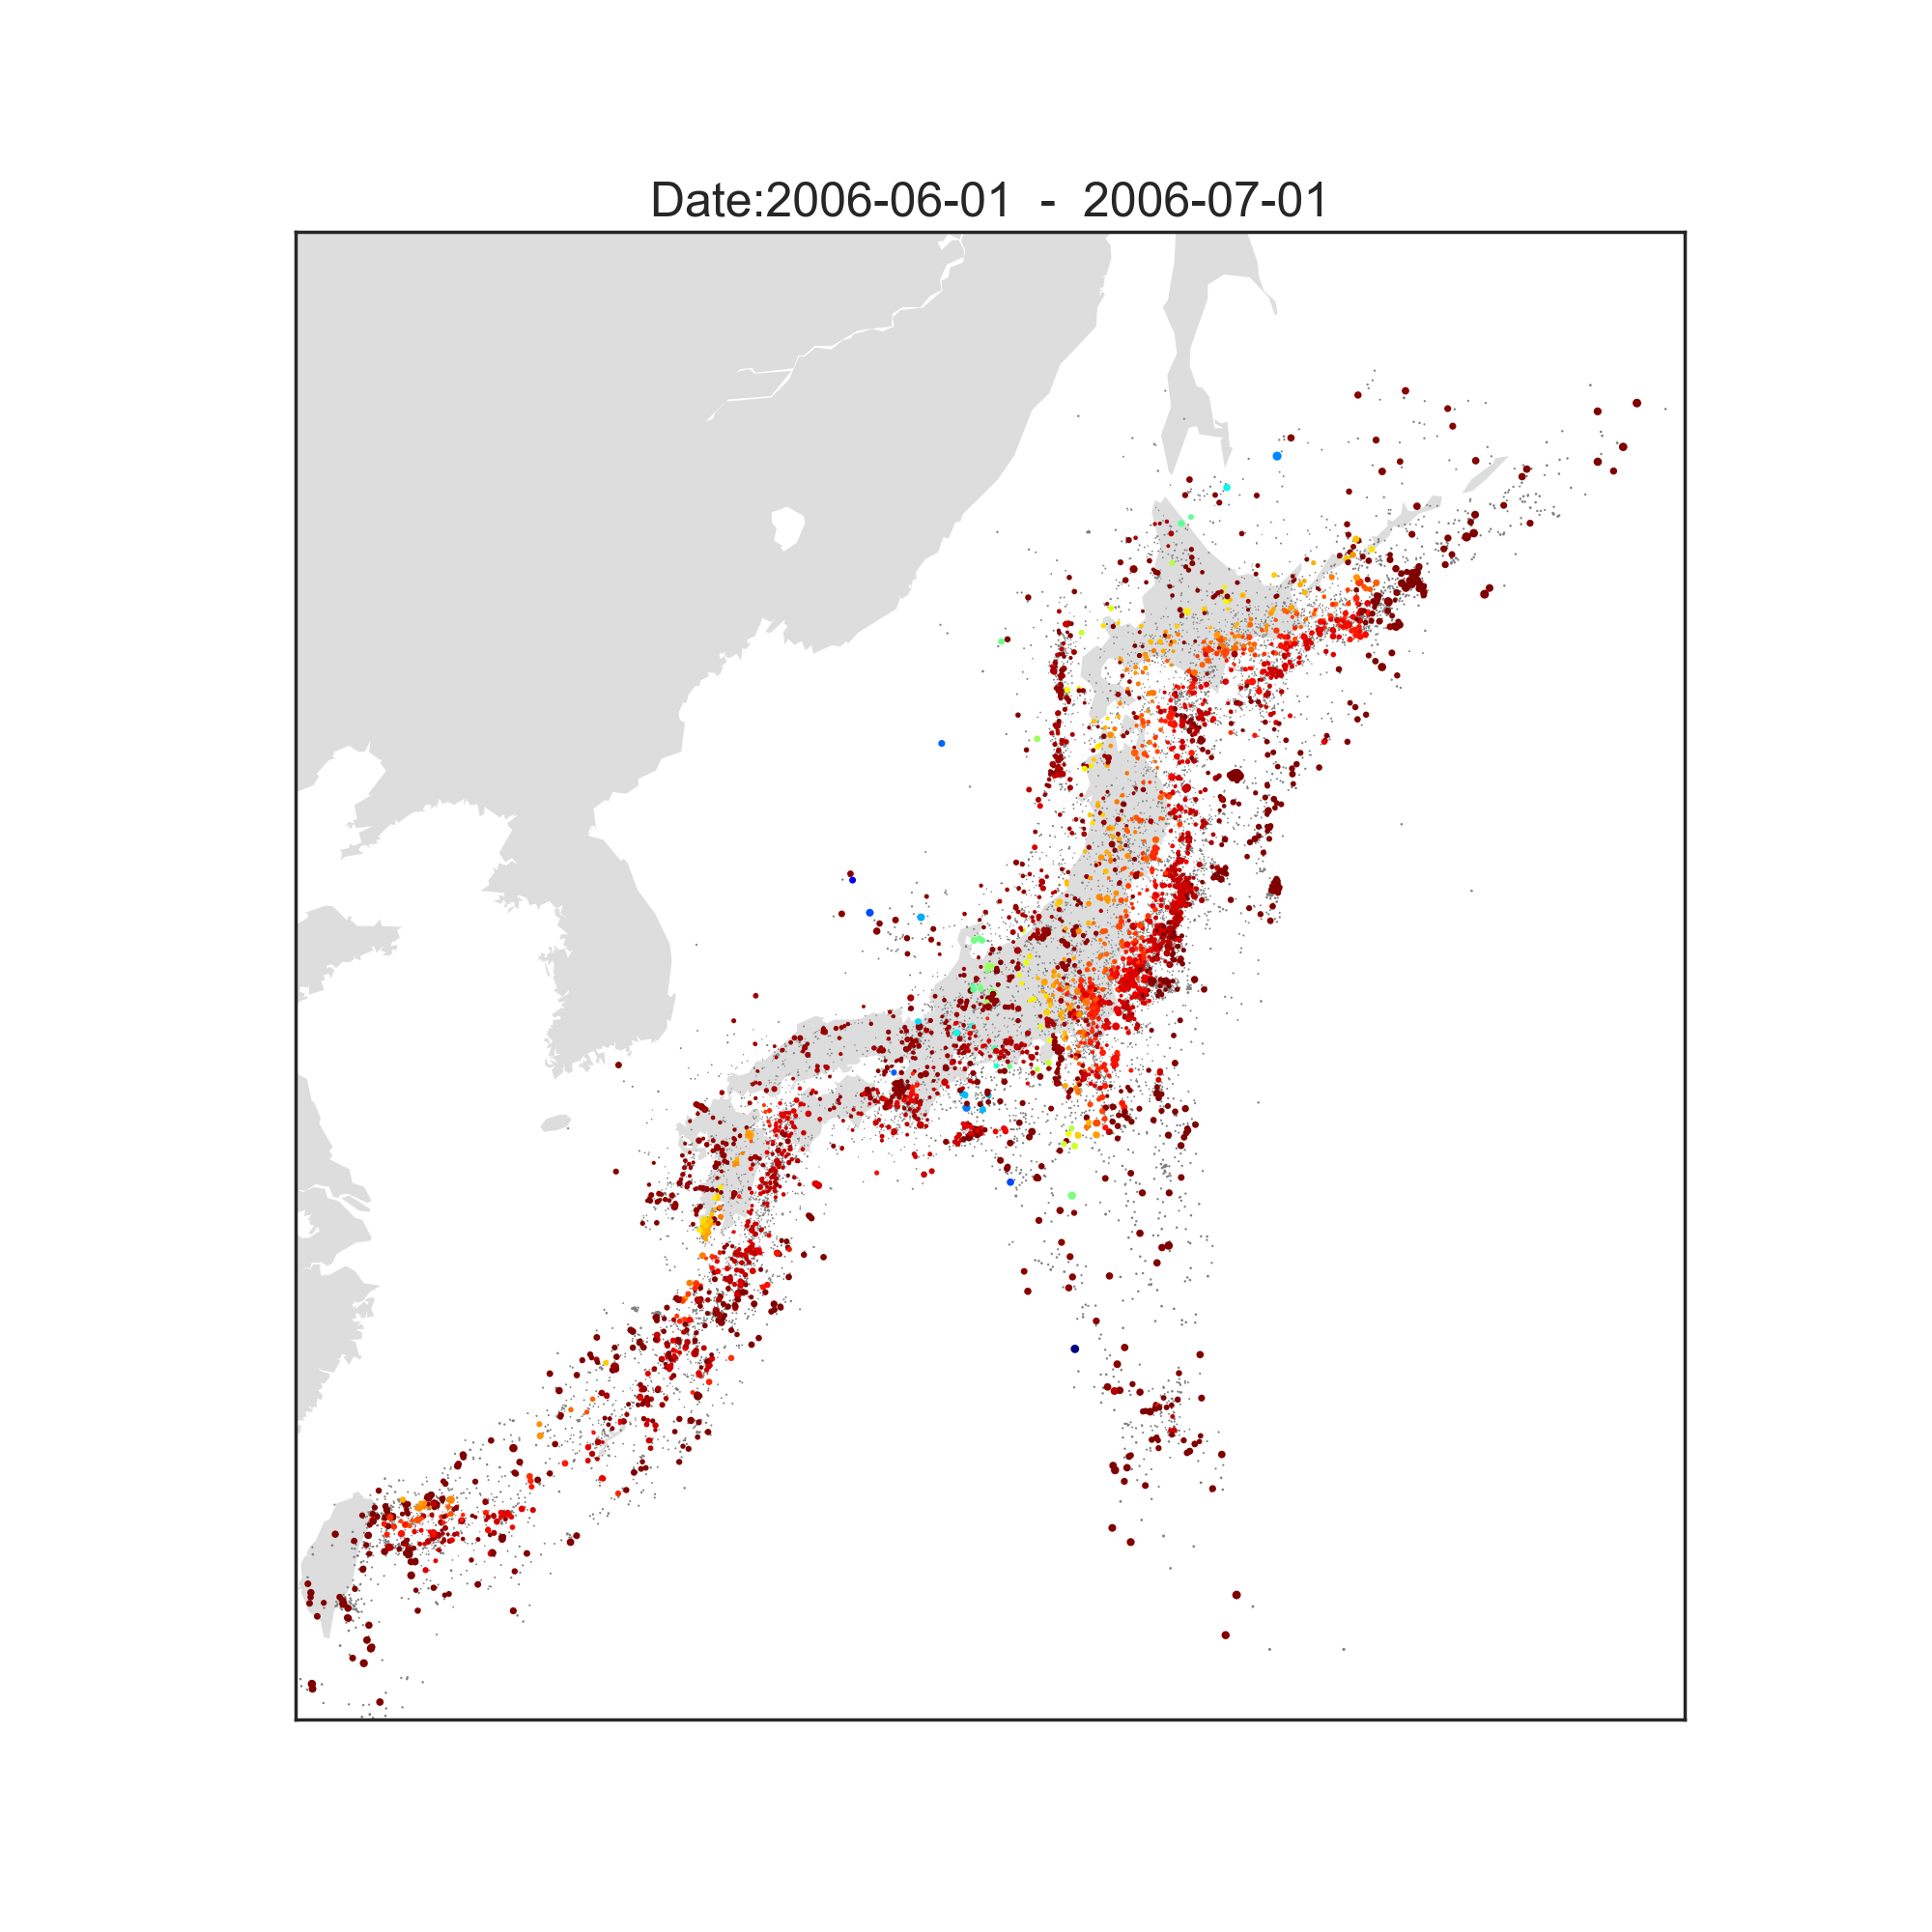

In [13]:
def draw2DMap(i, date, evlon, evlat, evDepth, evMag):
    
    # Delete current graph
    plt.cla()

    # Range of map
    # For whole area of Japan
    lonmin = 120
    lonmax = 155
    latmin = 20
    latmax = 50

    ## Data selection
    ## Select the date range
    # Cut by month
    #Mstart = datetime.datetime(1990, 1, 1)
    #Mend = datetime.datetime(2016, 12, 31)
    Mstart = datetime.datetime(2006, 1, 1)
    Mend = datetime.datetime(2007, 12, 31)
    Months = pd.date_range(Mstart, Mend, freq='M')
    Mbin = 1
    Mnum = len(Months) - 1
    m1 = Mstart + relativedelta(months=Mbin*i)
    m2 = m1 + relativedelta(months=Mbin)
    # datetime to datetime64
    d1 = np.datetime64(m1)
    d2 = np.datetime64(m2)
    Dstart = np.datetime64(Mstart)
    
    # Cut by day
    '''
    #Dstart = np.datetime64('1990-01-01T00:00:00.000000000')
    #Dend = np.datetime64('2017-01-01T00:00:00.000000000')
    Dstart = np.datetime64('2006-01-01T00:00:00.000000000')
    Dend = np.datetime64('2007-01-01T00:00:00.000000000')
    Dbin = 10
    Dnum = int((Dend - Dstart)/np.timedelta64(Dbin,'D'))
    d1 = Dstart + np.timedelta64(Dbin*i,'D')
    d2 = d1 + np.timedelta64(Dbin,'D')
    '''
    
    # Select the data
    select = np.where((date >= d1) & (date < d2))
    old = np.where((date >= Dstart) & (date < d2))

    # Data within setting bin
    datebin = date[select]
    evlonbin = evlon[select]
    evlatbin = evlat[select]
    evDepthbin = evDepth[select]
    evMagbin = evMag[select]
    # Data before setting bin
    evlonold = evlon[old]
    evlatold = evlat[old]
    evDepthold = evDepth[old]
    evMagold = evMag[old]
    
    '''
    ###############----Add transparency animation----###############
    # transparency factor
    if (i > 0):
        num_trans = 10
        i = i %(2*num_trans)
        trans = (abs(num_trans - i) % num_trans)/num_trans
    if (i == 0):
        trans = 1
    elif (i == num_trans):
        trans = (abs(num_trans - (i-1)) % num_trans)/num_trans
    '''
    

    ###############----Draw the basemap----###############
    map = Basemap(projection='merc',llcrnrlat=latmin,urcrnrlat=latmax,\
                llcrnrlon=lonmin,urcrnrlon=lonmax,lat_ts=5,resolution='l')
    map.fillcontinents(color='#DDDDDD',zorder=0)
    ###############----Draw the basemap----###############

    x, y = map(evlonbin, evlatbin)
    color = evDepthbin   # For color
    size = evMagbin * 2    # For plot size
    
    xold, yold = map(evlonold, evlatold)
    colorold = evDepthold   # For color
    sizeold = evMagold * 0.2    # For plot size

    # Set the color palette
    #cpalette = cm.seismic
    cpalette = cm.get_cmap('jet_r')

    # Add paralles and meridians
    '''
    parallels = np.arange(latmin,latmax,10)
    meridians = np.arange(lonmin,lonmax,10)
    map.drawparallels(parallels,labels=[1,0,0,0], dashes=[2,2])
    map.drawmeridians(meridians,labels=[0,0,0,1], dashes=[2,2])
    '''

    ###############----plot the data----###############
    # Current period
    map.scatter(x, y, s=size, c=color, cmap=cpalette, alpha=1, lw=0,  antialiased=True, zorder=10)
    # Past period
    #map.scatter(xold, yold, s=sizeold, c=colorold, cmap=cpalette, alpha=0.3, lw=0,  antialiased=True) 
    map.scatter(xold, yold, s=sizeold, c='grey', alpha=1.0, lw=0,  antialiased=True) 
    # alpha is transparency through 0 to 1(solid)

    plt.title('Date:' + str(d1.astype('M8[D]')) + '  -  ' + str(d2.astype('M8[D]')))
    #plt.title('Date:' + str(m1.astype('M8[D]')) + '  -  ' + str(m2.astype('M8[D]')))

fig = plt.figure(figsize=(10,10))

# Cut by month
#Mstart = datetime.datetime(1990, 1, 1)
#Mend = datetime.datetime(2016, 12, 31)
Mstart = datetime.datetime(2006, 1, 1)
Mend = datetime.datetime(2007, 12, 31)
Months = pd.date_range(Mstart, Mend, freq='M')
Mnum = len(Months)
ani = animation.FuncAnimation(fig, draw2DMap, fargs=(date, evlon, evlat, evDepth, evMag), interval=1000, frames=Mnum)

'''
# Cut by date
#Dstart = np.datetime64('1990-01-01T00:00:00.000000000')
#Dend = np.datetime64('2017-01-01T00:00:00.000000000')
Dstart = np.datetime64('2006-01-01T00:00:00.000000000')
Dend = np.datetime64('2007-01-01T00:00:00.000000000')
Dbin = 10
Dnum = int((Dend - Dstart)/np.timedelta64(Dbin,'D'))
ani = animation.FuncAnimation(fig, draw2DMap, fargs=(date, evlon, evlat, evDepth, evMag), interval=1000, frames=Dnum)
'''

ani.save('Results/EQDistribution_2D.mp4', fps=10, dpi=200)
plt.show()